In [1]:
# Your code here we are doing together looking for a breast cancer classification 

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column',None)


In [3]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
from ucimlrepo import fetch_ucirepo
cancer = fetch_ucirepo(id=17)
x = cancer.data.features
y = cancer.data.targets

In [5]:
y = cancer.data.targets.squeeze() # bu kod tek kolonlu dataframe i series e cevirir

In [6]:

main_df = pd.DataFrame(x,columns=cancer.data.feature_names)

In [7]:
main_df['target']=y

In [8]:
# b = bad tumor
# m = good tumor
main_df.value_counts('target')


target
B    357
M    212
Name: count, dtype: int64

In [9]:
main_df['target'] = y.map({'B':0,'M':1})

In [10]:
main_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

In [12]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
# max / median  
# std / mean    
# count → mean/median → std → max → scale 

In [14]:
#radius =	Hücre büyüklüğü
#texture=Yüzey pürüzlülüğü
#perimeter=	Çevre uzunluğu
#area	= hucre Alani
#smoothness =	Kenar düzgünlüğü
#compactness= Ne kadar sıkı
#concavity=İçe çöküklük
#concave_points=Çökük nokta sayısı
#symmetry=Simetri
#fractal_dimension=	Kenar karmaşıklığı
#1’ler → genel yapı
#2’ler → kararsızlık / düzensizlik
#3’ler → agresiflik sinyali

In [15]:
# area1,area2,area3 i suspecious

In [16]:
# in my opinion pca fits perfectly in this data

In [17]:
main_df.isna().sum().sum()

np.int64(0)

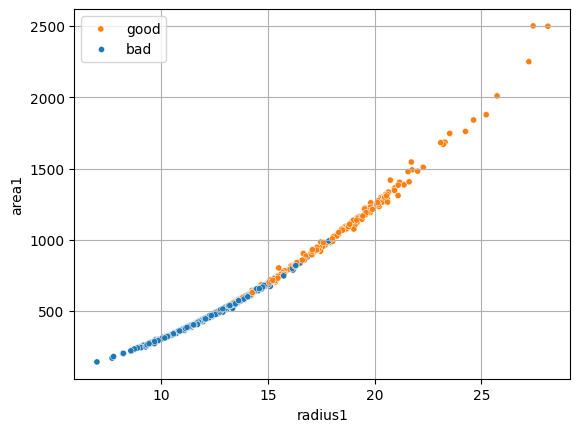

In [18]:
sns.scatterplot(data=main_df,x='radius1',y='area1',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#this one is a right skewed and area1 has a outlier

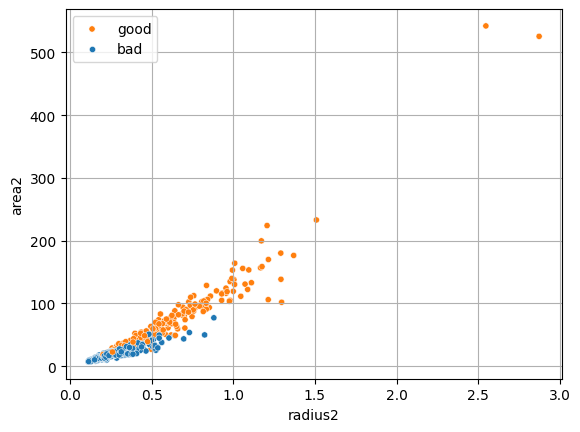

In [19]:
sns.scatterplot(data=main_df,x='radius2',y='area2',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#area 2 has a outlier

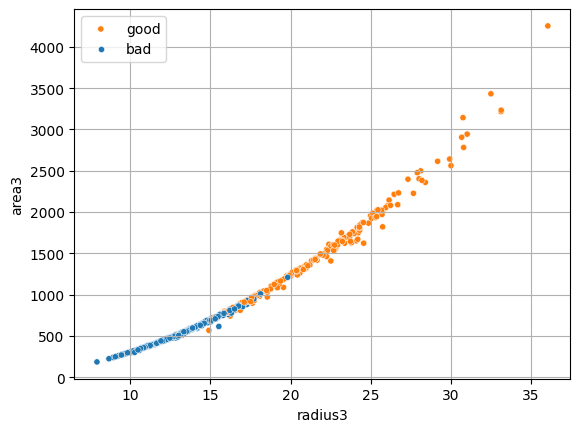

In [20]:
sns.scatterplot(data=main_df,x='radius3',y='area3',s=20,hue='target')
plt.grid()
plt.legend(['good','bad'])
#this one is a right skewed and area1 has a outlier

In [21]:
main_df.corr()['texture1'].sort_values(ascending=False)

texture1              1.000000
texture3              0.912045
target                0.415185
texture2              0.386358
perimeter3            0.358040
radius3               0.352573
area3                 0.343546
perimeter1            0.329533
radius1               0.323782
area1                 0.321086
concavity1            0.302418
concavity3            0.301025
concave_points3       0.295316
concave_points1       0.293464
perimeter2            0.281673
compactness3          0.277830
radius2               0.275869
area2                 0.259845
compactness1          0.236702
compactness2          0.191975
concave_points2       0.163851
concavity2            0.143293
fractal_dimension3    0.119205
symmetry3             0.105008
smoothness3           0.077503
symmetry1             0.071401
fractal_dimension2    0.054458
symmetry2             0.009127
smoothness2           0.006614
smoothness1          -0.023389
fractal_dimension1   -0.076437
Name: texture1, dtype: float64

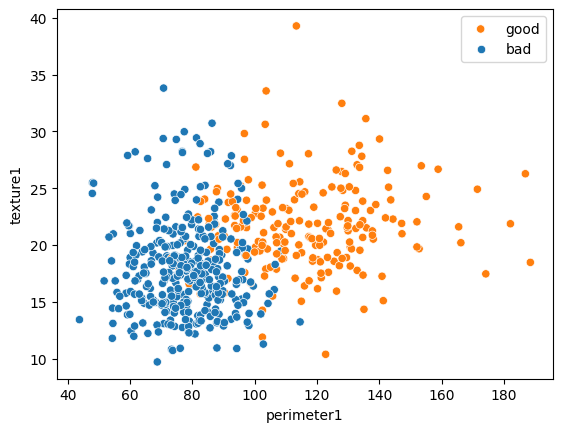

In [22]:
sns.scatterplot(data=main_df,x='perimeter1',y='texture1',hue='target')
plt.legend(['good','bad'])

In [23]:
main_df.corr()['compactness1'].sort_values(ascending=False)

compactness1          1.000000
concavity1            0.883121
compactness3          0.865809
concave_points1       0.831135
concavity3            0.816275
concave_points3       0.815573
compactness2          0.738722
fractal_dimension3    0.687382
smoothness1           0.659123
concave_points2       0.642262
symmetry1             0.602641
target                0.596534
perimeter3            0.590210
concavity2            0.570517
smoothness3           0.565541
fractal_dimension1    0.565369
perimeter1            0.556936
perimeter2            0.548905
radius3               0.535315
symmetry3             0.510223
area3                 0.509604
fractal_dimension2    0.507318
radius1               0.506124
area1                 0.498502
radius2               0.497473
area2                 0.455653
texture3              0.248133
texture1              0.236702
symmetry2             0.229977
smoothness2           0.135299
texture2              0.046205
Name: compactness1, dtype: float64

In [24]:
main_df.corr()['target'].sort_values(ascending=False)

target                1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: target, dtype: float64

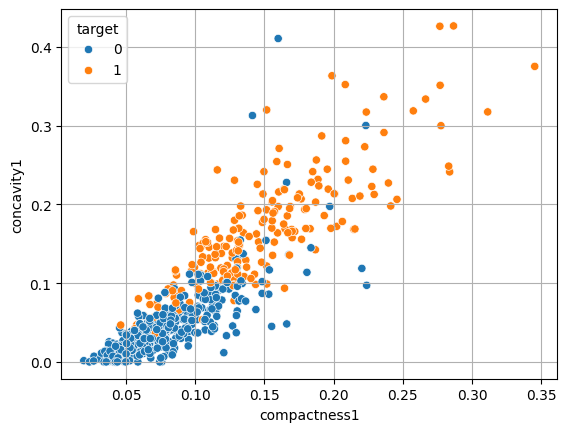

In [25]:
sns.scatterplot(data=main_df,x='compactness1',y='concavity1',hue='target')
plt.grid()

<Axes: >

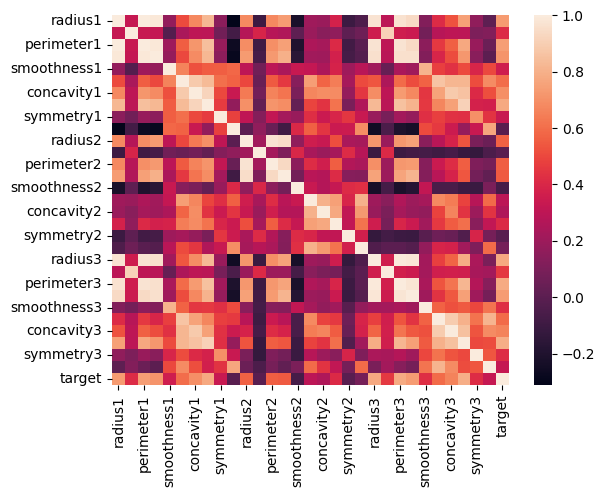

In [26]:
sns.heatmap(data=main_df.corr())

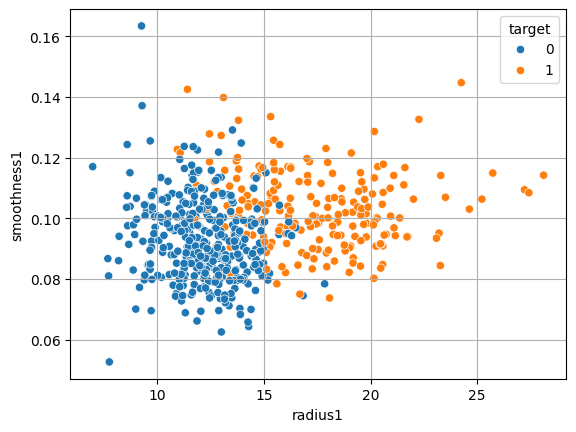

In [27]:
sns.scatterplot(data=main_df,x='radius1',y='smoothness1',hue='target')
plt.grid()

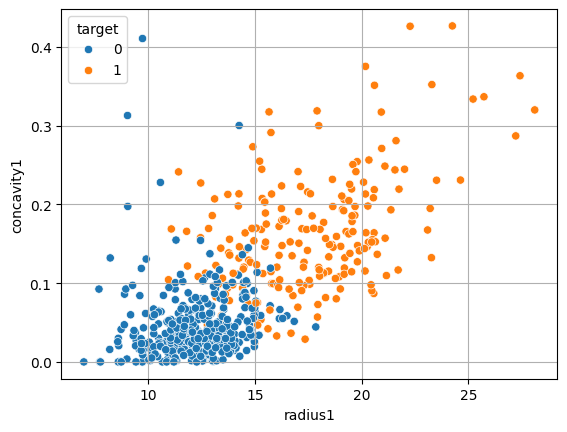

In [28]:
sns.scatterplot(data=main_df,x='radius1',y='concavity1',hue='target')
plt.grid()

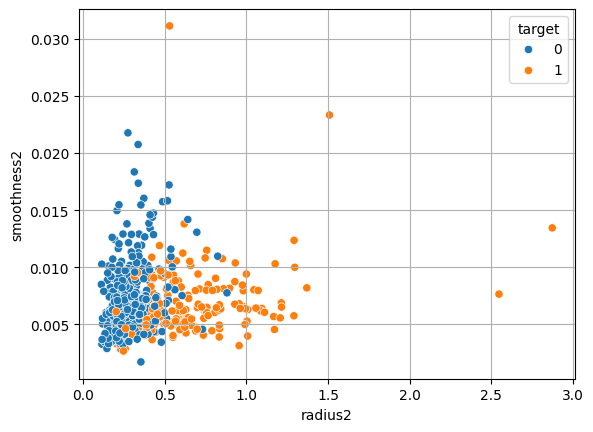

In [29]:
sns.scatterplot(data=main_df,x='radius2',y='smoothness2',hue='target')
plt.grid()

In [30]:
# “They look like outliers, but they may be clinically meaningful, so I did not apply log transformation or clipping.

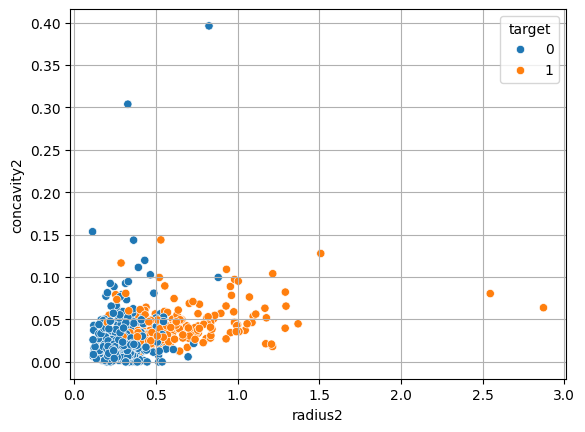

In [31]:
sns.scatterplot(data=main_df,x='radius2',y='concavity2',hue='target')
plt.grid()

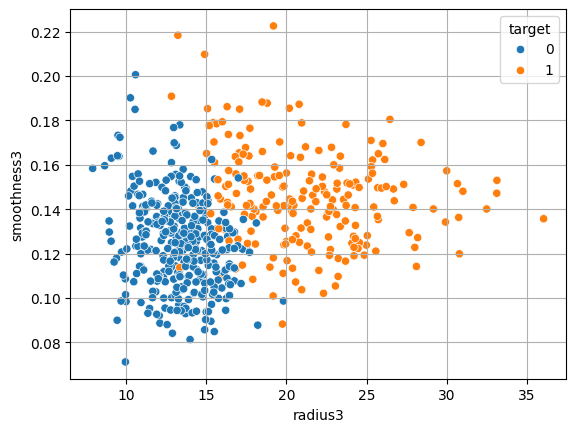

In [32]:
sns.scatterplot(data=main_df,x='radius3',y='smoothness3',hue='target')
plt.grid()

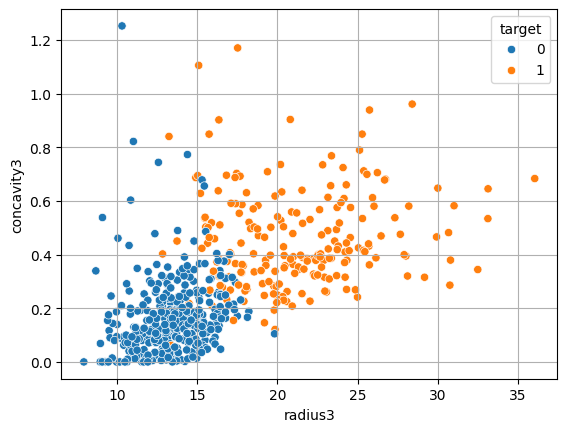

In [33]:
sns.scatterplot(data=main_df,x='radius3',y='concavity3',hue='target')
plt.grid()

In [34]:
main_df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'target'],
      dtype='object')

In [35]:
copy_df = main_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3','target']].copy()

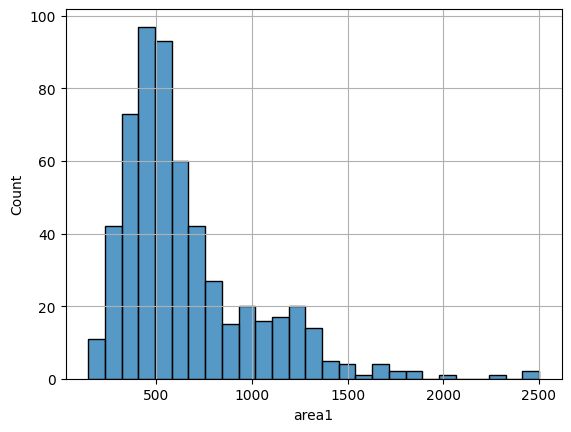

In [36]:
sns.histplot(copy_df['area1'])
plt.grid()

In [37]:
from sklearn.cluster import KMeans


In [38]:
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy_df)
    cluster_k.append(km.inertia_)

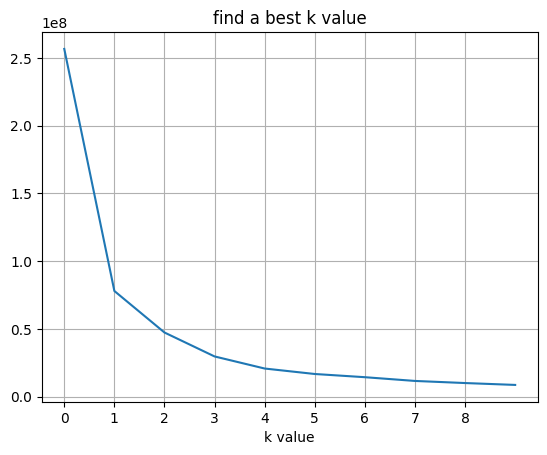

In [39]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=4

In [40]:
cluster_model = KMeans(n_clusters=4)
cluster_model.fit(copy_df)
copy_df['cluster'] = cluster_model.predict(copy_df)

In [41]:
copy_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1,1


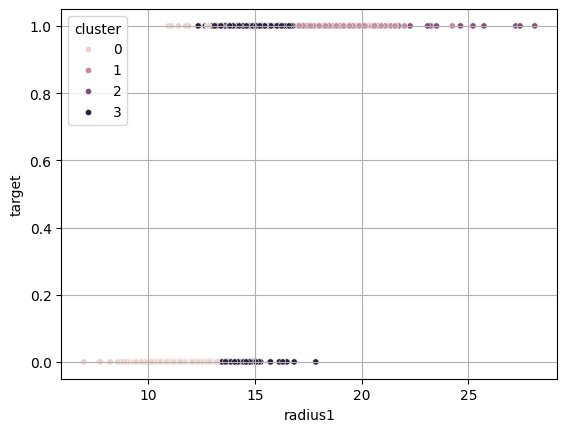

In [42]:
sns.scatterplot(data=copy_df,x='radius1',y='target',s=20,hue='cluster')
plt.grid()


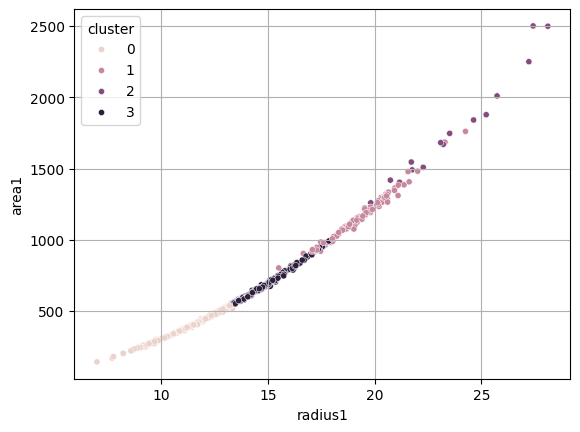

In [43]:
sns.scatterplot(data=copy_df,x='radius1',y='area1',s=20,hue='cluster')
plt.grid()


In [44]:
# clusters seperate to tumor size

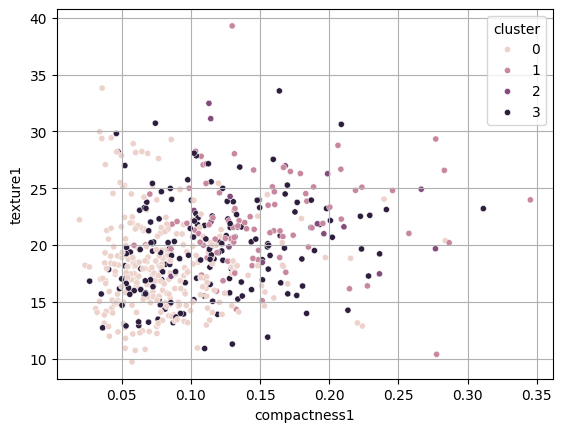

In [45]:
sns.scatterplot(data=copy_df,x='compactness1',y='texture1',s=20,hue='cluster')
plt.grid()


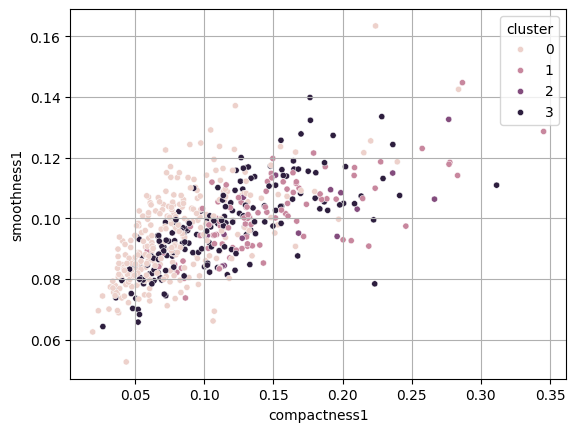

In [46]:
sns.scatterplot(data=copy_df,x='compactness1',y='smoothness1',s=20,hue='cluster')
plt.grid()


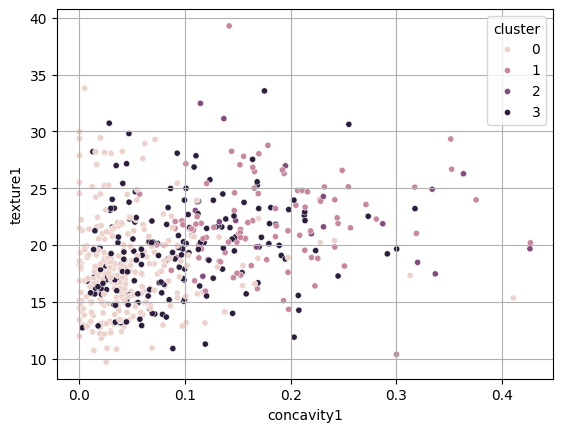

In [47]:
sns.scatterplot(data=copy_df,x='concavity1',y='texture1',s=20,hue='cluster')
plt.grid()


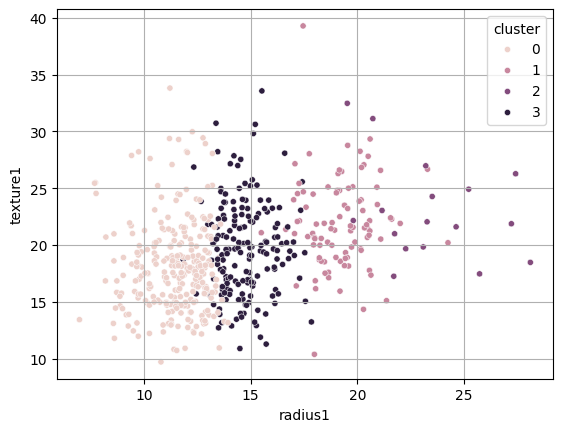

In [48]:
sns.scatterplot(data=copy_df,x='radius1',y='texture1',s=20,hue='cluster')
plt.grid()


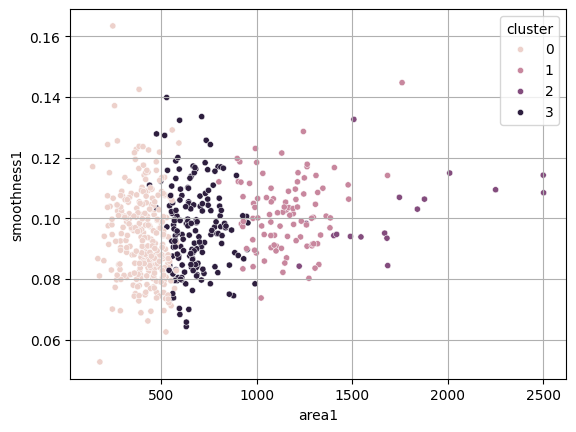

In [49]:
sns.scatterplot(data=copy_df,x='area1',y='smoothness1',s=20,hue='cluster')
plt.grid()


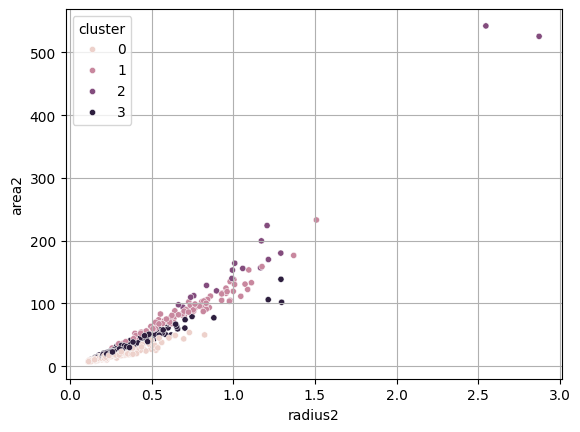

In [50]:
sns.scatterplot(data=copy_df,x='radius2',y='area2',s=20,hue='cluster')
plt.grid()


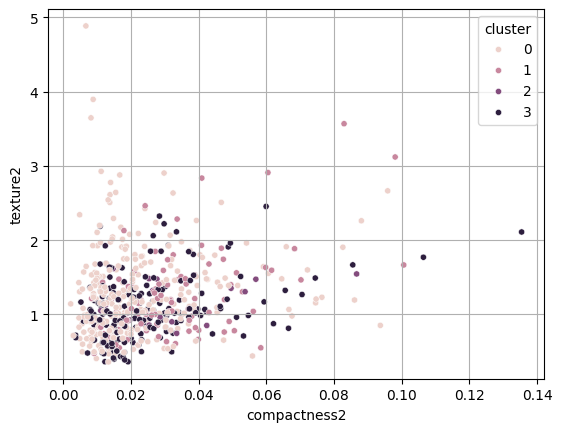

In [51]:
sns.scatterplot(data=copy_df,x='compactness2',y='texture2',s=20,hue='cluster')
plt.grid()


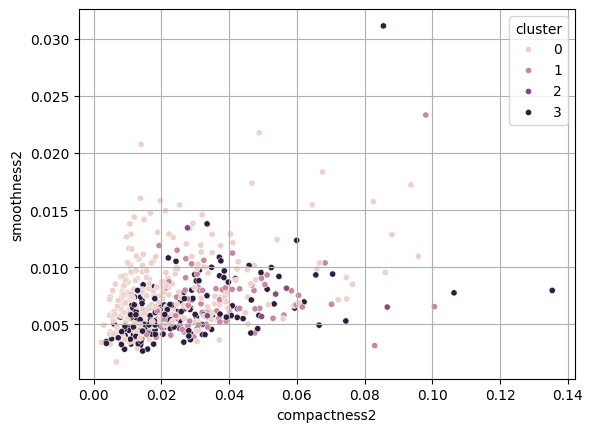

In [52]:
sns.scatterplot(data=copy_df,x='compactness2',y='smoothness2',s=20,hue='cluster')
plt.grid()


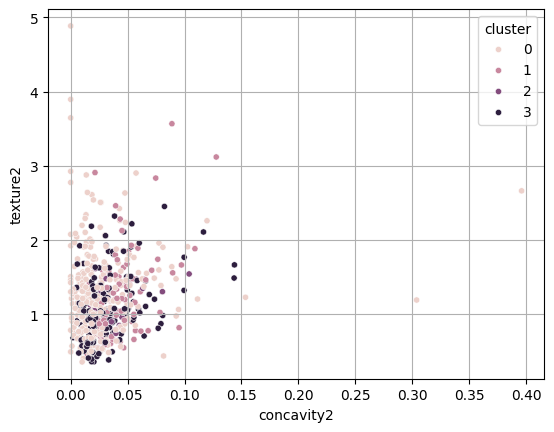

In [53]:
sns.scatterplot(data=copy_df,x='concavity2',y='texture2',s=20,hue='cluster')
plt.grid()


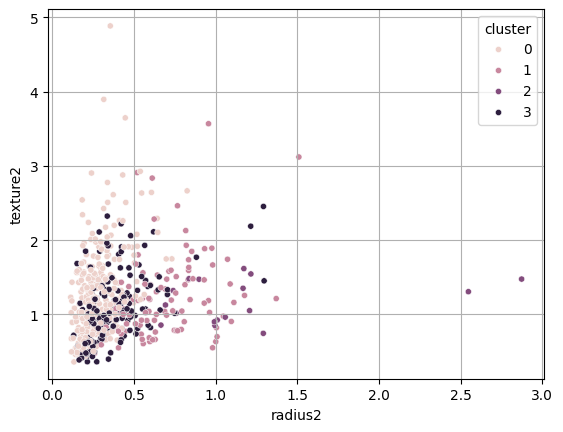

In [54]:
sns.scatterplot(data=copy_df,x='radius2',y='texture2',s=20,hue='cluster')
plt.grid()


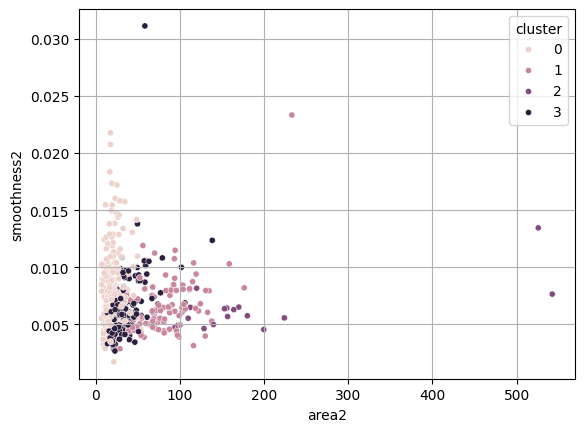

In [55]:
sns.scatterplot(data=copy_df,x='area2',y='smoothness2',s=20,hue='cluster')
plt.grid()


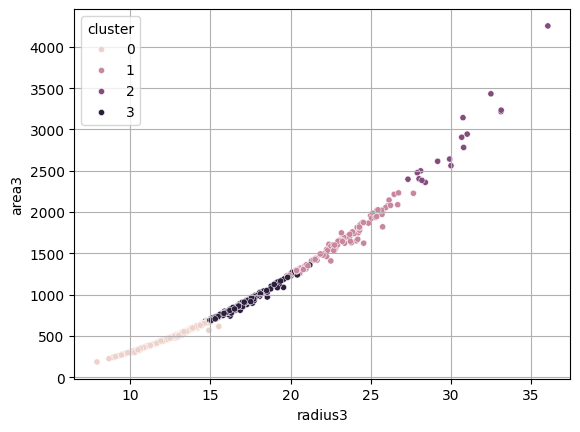

In [56]:
sns.scatterplot(data=copy_df,x='radius3',y='area3',s=20,hue='cluster')
plt.grid()


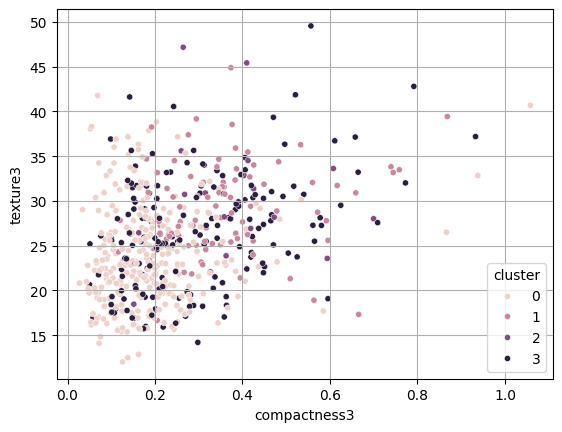

In [57]:
sns.scatterplot(data=copy_df,x='compactness3',y='texture3',s=20,hue='cluster')
plt.grid()


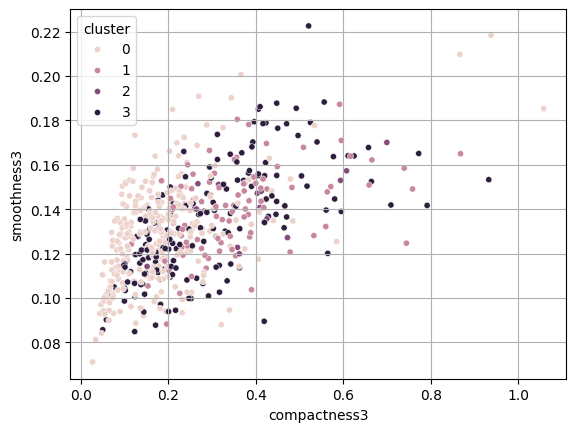

In [58]:
sns.scatterplot(data=copy_df,x='compactness3',y='smoothness3',s=20,hue='cluster')
plt.grid()


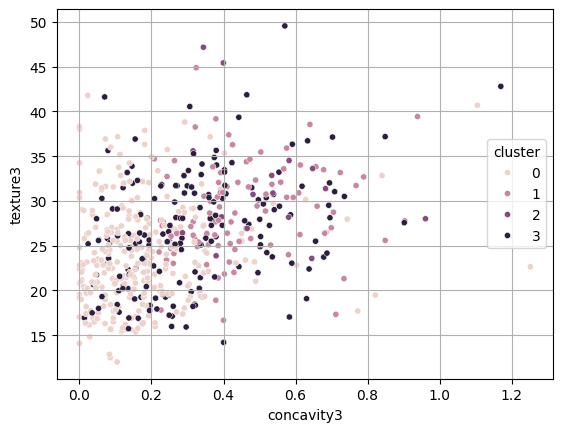

In [59]:
sns.scatterplot(data=copy_df,x='concavity3',y='texture3',s=20,hue='cluster')
plt.grid()


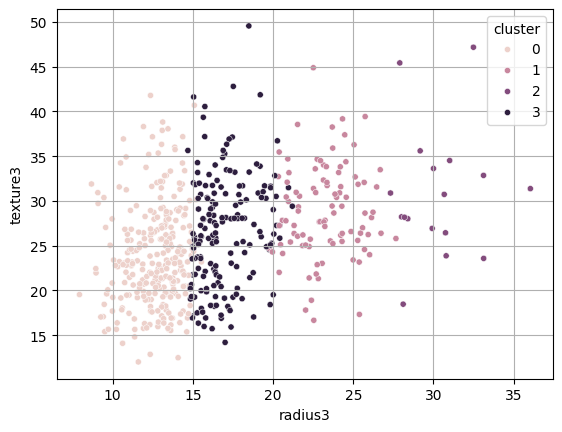

In [60]:
sns.scatterplot(data=copy_df,x='radius3',y='texture3',s=20,hue='cluster')
plt.grid()


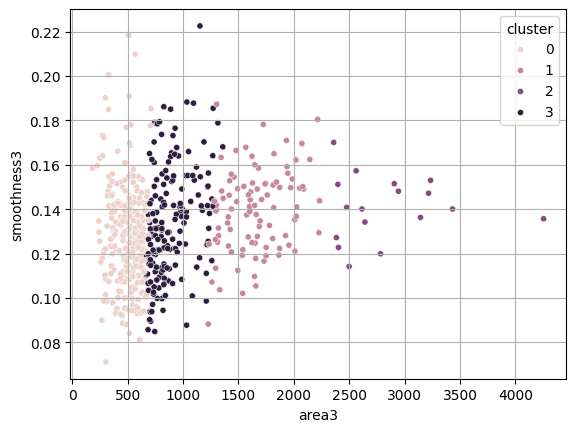

In [61]:
sns.scatterplot(data=copy_df,x='area3',y='smoothness3',s=20,hue='cluster')
plt.grid()


<Axes: xlabel='cluster', ylabel='target'>

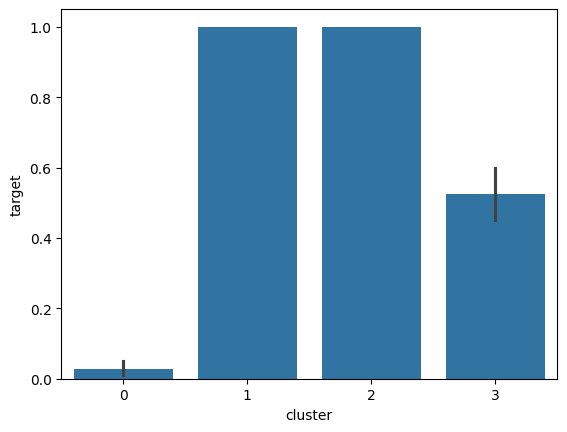

In [62]:
sns.barplot(data=copy_df, x='cluster', y='target')
# “Some clusters are mostly good tumors, while others are almost entirely bad tumors.”

<Axes: xlabel='cluster', ylabel='compactness1'>

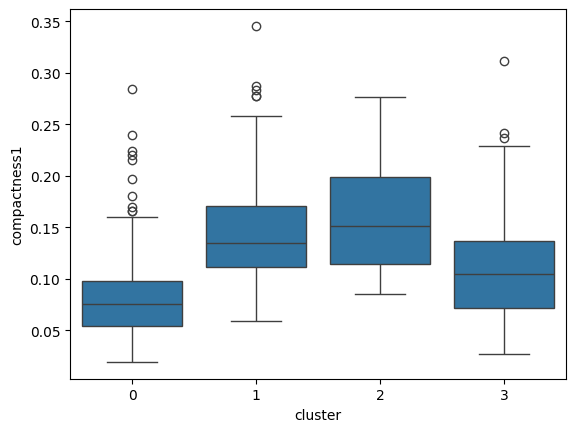

In [63]:
sns.boxplot(data=copy_df, x='cluster', y='compactness1')

In [64]:
copy_df.groupby('cluster').mean()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,11.472301,18.004397,73.663050,409.135106,0.094128,0.080898,0.046365,0.024229,0.177271,0.064307,0.282378,1.295021,1.980978,19.776518,0.007781,0.022267,0.027170,0.009896,0.021844,0.003862,12.642550,23.778191,82.057837,494.335106,0.128670,0.187667,0.169584,0.071420,0.277052,0.081927,0.028369
1,19.232211,21.877158,127.198947,1153.769474,0.101553,0.149240,0.177621,0.100509,0.194277,0.060857,0.704222,1.255986,4.946884,86.005158,0.006683,0.033224,0.044094,0.016105,0.021072,0.004183,23.248632,28.833789,155.091579,1659.631579,0.139680,0.354436,0.451283,0.190562,0.313611,0.086519,1.000000
2,23.433529,22.963529,156.082353,1742.117647,0.101643,0.163789,0.227629,0.130059,0.181406,0.058446,1.183059,1.176918,8.549412,192.608235,0.006336,0.033282,0.043962,0.015871,0.018822,0.003448,30.295294,30.930588,204.852941,2838.294118,0.140571,0.387412,0.503412,0.226765,0.288876,0.081751,1.000000
3,14.730343,19.599200,96.114857,674.466857,0.096625,0.111969,0.095475,0.052817,0.180288,0.061842,0.365138,1.073529,2.610617,33.885657,0.006112,0.025690,0.031710,0.012124,0.018325,0.003510,16.961886,26.513486,112.429257,889.904571,0.133563,0.294270,0.317843,0.132069,0.298402,0.086015,0.525714


In [65]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [66]:
copy1_df =main_df[['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3','target']].copy()


In [67]:
ss = StandardScaler()
scaled_df=ss.fit_transform(copy1_df)
scaled_df= pd.DataFrame(scaled_df,columns=copy1_df.columns)
scaled_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676


In [68]:
#After scaling the data, we rechecked the number of clusters
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy1_df)
    cluster_k.append(km.inertia_)

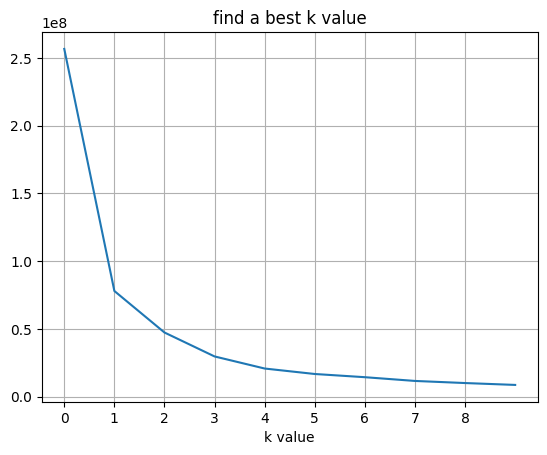

In [69]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=4

In [70]:
scaled_cluster_model = KMeans(n_clusters=4)
scaled_cluster_model.fit(scaled_df)
scaled_df['cluster'] = scaled_cluster_model.predict(scaled_df)

In [71]:
scaled_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.297676,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.297676,2
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.297676,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.297676,2
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.297676,1


In [72]:
scaled_df.groupby('cluster').mean()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.445794,-0.267248,-0.472602,-0.455048,-0.475790,-0.657309,-0.667471,-0.660392,-0.426668,-0.341730,-0.473952,-0.143589,-0.482540,-0.417699,-0.268845,-0.552145,-0.460744,-0.562272,-0.195092,-0.431640,-0.494535,-0.280167,-0.517993,-0.488086,-0.466015,-0.589773,-0.621014,-0.653883,-0.347925,-0.484471,-0.665797
1,1.873214,0.696371,1.913412,1.997039,0.628149,1.406299,1.685565,1.930575,0.714882,-0.015046,2.034565,0.318097,2.060580,2.030775,0.029118,0.839437,0.697914,1.161383,0.403568,0.364423,1.949256,0.595580,1.987041,2.062978,0.320876,0.948675,1.126758,1.569468,0.430619,0.260795,1.297676
2,0.588699,0.436599,0.604925,0.499664,0.510897,0.663702,0.688125,0.732955,0.439164,0.106924,0.207553,-0.187767,0.187288,0.181798,-0.156613,0.289573,0.217134,0.297638,-0.117448,0.056366,0.653372,0.559487,0.659823,0.527510,0.757568,0.850338,0.859958,0.916723,0.708320,0.638805,1.238157
3,-0.878632,-0.329597,-0.834417,-0.775049,0.431535,0.226366,-0.012295,-0.331092,0.296469,1.194622,-0.173542,0.673944,-0.121870,-0.349430,1.363989,0.986011,0.871587,0.742689,0.677463,1.338367,-0.867684,-0.426979,-0.816425,-0.749207,0.178972,-0.020457,-0.060907,-0.405652,-0.297786,0.530151,-0.742276


In [73]:
scaled_df.isna().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
target                0
cluster               0
dtype: int64

In [74]:
scaled_df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target,cluster
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-1.373633e-16,6.868164e-17,-1.248757e-16,-2.185325e-16,-8.366672e-16,1.873136e-16,4.995028e-17,-4.995028e-17,1.748260e-16,4.745277e-16,2.372638e-16,-1.123881e-16,-1.123881e-16,-1.311195e-16,-1.529727e-16,1.748260e-16,1.623384e-16,0.000000,8.741299e-17,-6.243785e-18,-8.241796e-16,1.248757e-17,-3.746271e-16,0.000000,-2.372638e-16,-3.371644e-16,7.492542e-17,2.247763e-16,2.622390e-16,-5.744282e-16,4.995028e-17,0.980668
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.131174
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,-1.059924e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.776065e+00,-1.298098e+00,-1.057501e+00,-1.913447,-1.532890e+00,-1.096968e+00,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00,-7.706085e-01,0.000000
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,-6.235706e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.240183e-01,-6.929263e-01,-5.571612e-01,-0.674490,-6.516807e-01,-5.851185e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-0.642136,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01,-7.706085e-01,0.000000
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,-2.922452e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.203352e-01,-2.810204e-01,-1.990654e-01,-0.140496,-2.194304e-01,-2.299405e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-0.341181,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01,-7.706085e-01,0.000000
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,2.660996e-01,4.665523e-01,2.430307e-01,1.067726e-01,3.683553e-01,3.896541e-01,3.367521e-01,0.472657,3.556925e-01,2.886421e-01,5.220158e-01,6.583411e-01,5.402790e-01,0.357589,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01,1.297676e+00,2.000000
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,8.906909e+00,6.655279e+00,9.461986e+00,1.104184e+01,8.029999e+00,6.143482e+00,1.207268e+01,6.649601,7.071917e+00,9.851593e+00,4.094189e+00,3.885905e+00,4.287337e+00,5.930172,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00,1.297676e+00,3.000000


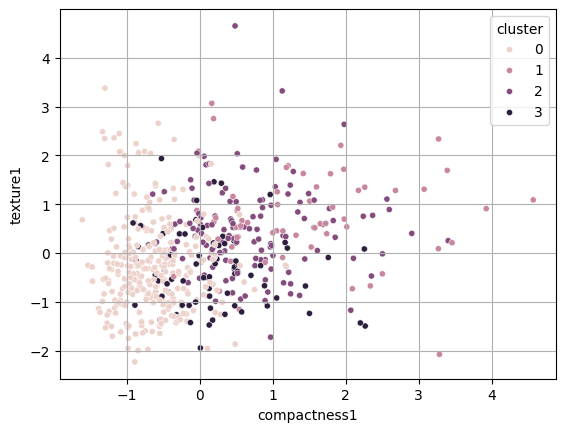

In [75]:
sns.scatterplot(data=scaled_df,x='compactness1',y='texture1',s=20,hue='cluster')
plt.grid()


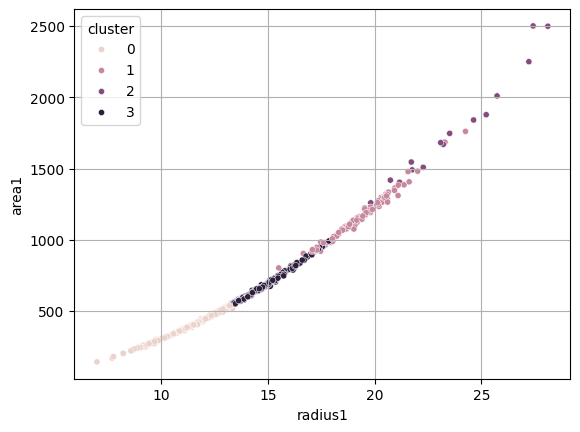

In [76]:
sns.scatterplot(data=copy_df,x='radius1',y='area1',s=20,hue='cluster')
plt.grid()


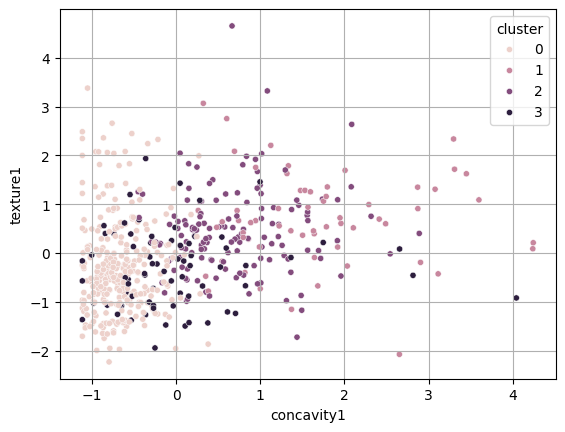

In [77]:
sns.scatterplot(data=scaled_df,x='concavity1',y='texture1',s=20,hue='cluster')
plt.grid()


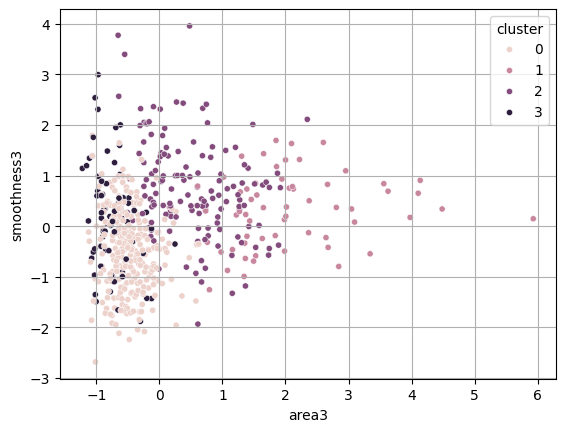

In [78]:
sns.scatterplot(data=scaled_df,x='area3',y='smoothness3',s=20,hue='cluster')
plt.grid()


In [79]:
# scaled works well

<Axes: xlabel='cluster', ylabel='area1'>

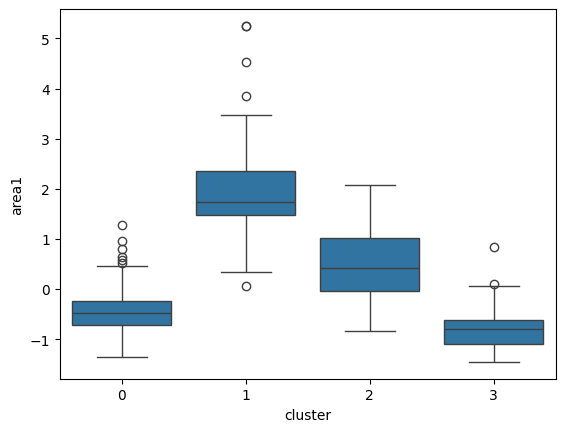

In [80]:
sns.boxplot(data=scaled_df, x='cluster', y='area1')

<Axes: xlabel='cluster', ylabel='compactness1'>

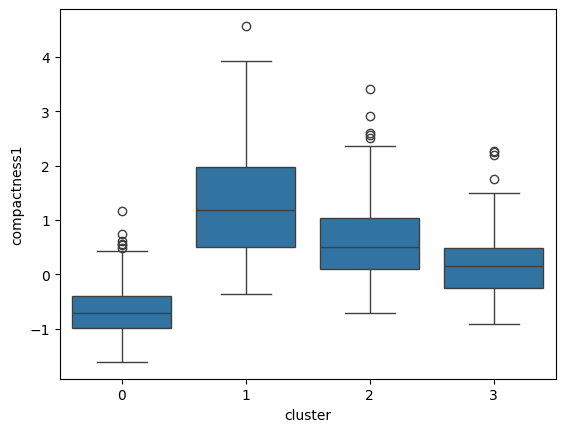

In [81]:
sns.boxplot(data=scaled_df, x='cluster', y='compactness1')

<Axes: xlabel='cluster', ylabel='target'>

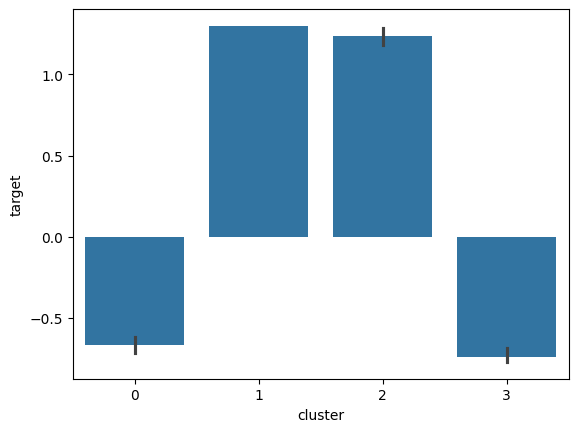

In [82]:
sns.barplot(data=scaled_df,y='target',x='cluster')

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
train_df,test_df = train_test_split(main_df,random_state=46)

In [85]:
train_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.0470,12.69,0.004928,0.003012,0.002620,0.003390,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,0
74,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,0.2505,1.0250,1.7400,19.68,0.004854,0.018190,0.018260,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609,0
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,0.6643,1.3610,4.5420,81.89,0.005467,0.020750,0.031850,0.014660,0.01029,0.002205,25.68,32.07,168.20,2022.0,0.1368,0.31010,0.43990,0.22800,0.2268,0.07425,1
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,0.06312,0.2684,1.4090,1.7500,16.39,0.013800,0.010670,0.008347,0.009472,0.01798,0.004261,10.75,20.88,68.09,355.2,0.1467,0.09370,0.04043,0.05159,0.2841,0.08175,0
468,17.600,23.33,119.00,980.5,0.09289,0.20040,0.213600,0.100200,0.1696,0.07369,0.9289,1.4650,5.8010,104.90,0.006766,0.070250,0.065910,0.023110,0.01673,0.011300,21.57,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.012850,0.016130,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834,0
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.2350,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.1072,0.10710,0.03517,0.03312,0.1859,0.06810,0
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,0.3414,1.3090,2.4070,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666,1
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,0.2409,1.3670,1.4770,18.76,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484,0


In [86]:
test_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,target
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,7.804,130.80,0.007964,0.047320,0.07649,0.019360,0.02736,0.005928,23.680,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469,1
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,0.3249,0.9591,2.183,23.47,0.008328,0.008722,0.01349,0.008670,0.03218,0.002386,12.840,22.47,81.81,506.2,0.1249,0.08720,0.09076,0.06316,0.3306,0.07036,0
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.082970,0.08890,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230,1
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.873,43.95,0.004714,0.020150,0.03697,0.011100,0.01237,0.002556,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075,1
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.190,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.990,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,0
530,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.9070,3.149,30.66,0.006587,0.018150,0.01737,0.013160,0.01835,0.002318,13.500,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757,0
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,0.3368,2.7770,2.222,17.81,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116,0
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,0.1779,1.0300,1.318,12.30,0.012620,0.023480,0.01800,0.012850,0.02220,0.008313,11.690,20.74,76.08,411.1,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680,0


In [87]:
x_train = train_df.drop(columns=('target'))
y_train = train_df['target']

In [88]:
y_train

315    0
74     0
449    1
273    0
468    1
      ..
403    0
442    0
372    1
552    0
189    0
Name: target, Length: 426, dtype: int64

In [89]:
x_train

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
315,12.490,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,0.1215,0.05673,0.1716,0.7151,1.0470,12.69,0.004928,0.003012,0.002620,0.003390,0.01393,0.001344,13.34,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174
74,12.310,16.52,79.19,470.9,0.09172,0.06829,0.033720,0.022720,0.1720,0.05914,0.2505,1.0250,1.7400,19.68,0.004854,0.018190,0.018260,0.007965,0.01386,0.002304,14.11,23.21,89.71,611.1,0.1176,0.18430,0.17030,0.08660,0.2618,0.07609
449,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,0.6643,1.3610,4.5420,81.89,0.005467,0.020750,0.031850,0.014660,0.01029,0.002205,25.68,32.07,168.20,2022.0,0.1368,0.31010,0.43990,0.22800,0.2268,0.07425
273,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,0.2081,0.06312,0.2684,1.4090,1.7500,16.39,0.013800,0.010670,0.008347,0.009472,0.01798,0.004261,10.75,20.88,68.09,355.2,0.1467,0.09370,0.04043,0.05159,0.2841,0.08175
468,17.600,23.33,119.00,980.5,0.09289,0.20040,0.213600,0.100200,0.1696,0.07369,0.9289,1.4650,5.8010,104.90,0.006766,0.070250,0.065910,0.023110,0.01673,0.011300,21.57,28.87,143.60,1437.0,0.1207,0.47850,0.51650,0.19960,0.2301,0.12240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,12.940,16.17,83.18,507.6,0.09879,0.08836,0.032960,0.023900,0.1735,0.06200,0.1458,0.9050,0.9975,11.36,0.002887,0.012850,0.016130,0.007308,0.01870,0.001972,13.86,23.02,89.69,580.9,0.1172,0.19580,0.18100,0.08388,0.3297,0.07834
442,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.2350,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.27,17.50,97.90,706.6,0.1072,0.10710,0.03517,0.03312,0.1859,0.06810
372,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.125500,0.1973,0.06183,0.3414,1.3090,2.4070,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.69,21.84,152.10,1535.0,0.1192,0.28400,0.40240,0.19660,0.2730,0.08666
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,0.2409,1.3670,1.4770,18.76,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.87,36.00,88.10,594.7,0.1234,0.10640,0.08653,0.06498,0.2407,0.06484


In [90]:
x_test = test_df.drop(columns=('target'))
y_test = test_df['target']

In [91]:
x_test

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
302,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,1.0720,1.7430,7.804,130.80,0.007964,0.047320,0.07649,0.019360,0.02736,0.005928,23.680,29.43,158.80,1696.0,0.1347,0.33910,0.49320,0.19230,0.3294,0.09469
55,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,0.3249,0.9591,2.183,23.47,0.008328,0.008722,0.01349,0.008670,0.03218,0.002386,12.840,22.47,81.81,506.2,0.1249,0.08720,0.09076,0.06316,0.3306,0.07036
12,19.170,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,0.07800,0.9555,3.5680,11.070,116.20,0.003139,0.082970,0.08890,0.040900,0.04484,0.012840,20.960,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230
446,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.873,43.95,0.004714,0.020150,0.03697,0.011100,0.01237,0.002556,21.530,38.54,145.40,1437.0,0.1401,0.37620,0.63990,0.19700,0.2972,0.09075
10,16.020,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,0.3795,1.1870,2.466,40.51,0.004029,0.009269,0.01101,0.007591,0.01460,0.003042,19.190,33.88,123.80,1150.0,0.1181,0.15510,0.14590,0.09975,0.2948,0.08452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,0.1830,0.06105,0.2251,0.7815,1.429,15.48,0.009019,0.008985,0.01196,0.008232,0.02388,0.001619,11.990,16.30,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772
530,11.750,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,0.06677,0.4384,1.9070,3.149,30.66,0.006587,0.018150,0.01737,0.013160,0.01835,0.002318,13.500,27.98,88.52,552.3,0.1349,0.18540,0.13660,0.10100,0.2478,0.07757
314,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,0.3368,2.7770,2.222,17.81,0.020750,0.014030,0.00000,0.000000,0.06146,0.006820,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
507,11.060,17.12,71.25,366.5,0.11940,0.10710,0.04063,0.04268,0.1954,0.07976,0.1779,1.0300,1.318,12.30,0.012620,0.023480,0.01800,0.012850,0.02220,0.008313,11.690,20.74,76.08,411.1,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680


In [92]:
y_test

302    1
55     0
12     1
446    1
10     1
      ..
153    0
530    0
314    0
507    0
351    1
Name: target, Length: 143, dtype: int64

In [94]:
ss= StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss,columns=x_train.columns)

In [95]:
x_train_ss

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,-0.457054,-0.578070,-0.518762,-0.485721,-0.810612,-1.243234,-1.060887,-1.101970,-2.187917,-0.842105,-0.818384,-0.909550,-0.876514,-0.576694,-0.702108,-1.290398,-0.936548,-1.354424,-0.774548,-0.884977,-0.605443,-0.989808,-0.679421,-0.591708,-0.962755,-1.316020,-1.236056,-1.321382,-1.549344,-1.248972
1,-0.508276,-0.654695,-0.518762,-0.516138,-0.341130,-0.672882,-0.689446,-0.676926,-0.350202,-0.499277,-0.543210,-0.337133,-0.544564,-0.431454,-0.727129,-0.392960,-0.426333,-0.613415,-0.783175,-0.530359,-0.444035,-0.410473,-0.522820,-0.472059,-0.650647,-0.440279,-0.492038,-0.429181,-0.438353,-0.428032
2,1.993053,0.274090,1.912546,2.079609,0.022523,0.264247,0.878767,1.742875,-0.954283,-0.859176,0.899972,0.283492,0.797609,0.861168,-0.519859,-0.241594,0.017007,0.470968,-1.223115,-0.566929,1.981280,1.056072,1.827397,2.051314,0.181642,0.377175,0.837058,1.717811,-0.993056,-0.533295
3,-1.239039,-0.852062,-1.248856,-1.030682,-0.437015,-1.080413,-0.977612,-0.902528,0.963491,0.066889,-0.480782,0.372153,-0.539774,-0.499814,2.297726,-0.837600,-0.749719,-0.369328,-0.275456,0.192546,-1.148361,-0.796144,-1.170185,-0.929732,0.610791,-1.029001,-1.132282,-0.960767,-0.084928,-0.104232
4,0.997074,0.926561,1.124259,0.932545,-0.258029,1.842951,1.595055,1.343835,-0.437539,1.570499,1.822800,0.475590,1.400676,1.339278,-0.080636,2.685221,1.128129,1.839607,-0.429497,2.792713,1.119738,0.526394,1.090802,1.005051,-0.516267,1.471445,1.214687,1.286591,-0.940755,2.221290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-0.328999,-0.735964,-0.354089,-0.411808,0.161024,-0.290680,-0.699098,-0.646151,-0.295616,-0.092434,-0.908365,-0.558785,-0.900225,-0.604330,-1.392218,-0.708701,-0.495818,-0.719829,-0.186729,-0.652998,-0.496440,-0.441922,-0.523418,-0.526071,-0.667986,-0.365551,-0.439288,-0.470481,0.637771,-0.299313
422,-0.089965,-0.824198,-0.139889,-0.189218,-0.593272,-0.694021,-0.983708,-1.010321,-1.496499,-0.593163,-0.174219,-1.337707,-0.307456,-0.230735,-0.193569,-0.784976,-0.769489,-0.987240,-0.979115,-0.434316,-0.200874,-1.355616,-0.277587,-0.301258,-1.101470,-0.941927,-1.158213,-1.241212,-1.641266,-0.885127
423,2.069885,-0.984413,2.044615,2.085294,0.254068,0.911725,1.335972,2.003686,0.570475,-0.116617,-0.226184,0.187443,-0.225067,-0.028769,-0.871846,0.113172,0.099216,0.271746,-0.427032,0.231702,1.354513,-0.637241,1.345317,1.180322,-0.581289,0.207576,0.652188,1.241039,-0.260848,0.176661
424,-0.377376,2.342957,-0.429616,-0.410955,-0.977523,-1.167060,-0.864073,-0.878533,-1.008868,-0.893316,-0.576691,0.294575,-0.670542,-0.450570,0.618942,-0.739448,-0.588793,-0.396377,-0.153456,-0.743869,-0.494344,1.706582,-0.571028,-0.501390,-0.399226,-0.946476,-0.905014,-0.757455,-0.772760,-1.071626


In [96]:

x_test_ss = ss.transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss,columns=x_test.columns)

In [97]:
x_test_ss

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,1.705642,1.049624,1.772222,1.690147,0.815173,1.526829,1.781747,2.068889,1.574850,1.712752,2.321880,0.989084,2.360124,1.877438,0.324436,1.329426,1.473275,1.232222,0.880466,0.808326,1.562038,0.619088,1.545934,1.468268,0.090610,0.565618,1.099821,1.175749,0.633016,0.636045
1,-0.733082,-0.136898,-0.760201,-0.692107,-0.091118,-0.931112,-0.732118,-0.675362,0.377606,-0.509234,-0.283730,-0.458857,-0.332365,-0.352704,0.447513,-0.952780,-0.581942,-0.499227,1.474447,-0.500068,-0.710254,-0.532961,-0.759368,-0.659671,-0.334204,-1.071238,-0.884161,-0.785090,0.652035,-0.755836
2,1.443842,1.267889,1.677298,1.337642,0.062298,2.707524,1.504884,1.646375,2.113428,2.183608,1.915571,4.360041,3.924555,1.574074,-1.307011,3.437324,1.878120,4.721037,3.034573,3.361580,0.991869,0.703505,1.333339,0.817260,-1.253189,0.898318,0.462387,0.938881,0.446002,1.071401
3,1.039759,2.017882,1.054097,0.935672,0.244835,0.528951,1.038789,0.893415,-0.375675,-0.496432,-0.057732,-0.241084,-0.001851,0.072837,-0.774466,-0.277070,0.184034,-0.105642,-0.966791,-0.437271,1.111353,2.127013,1.144699,1.005051,0.324692,0.806695,1.823035,1.247113,0.122689,0.410644
4,0.547461,0.905663,0.451532,0.413168,-1.027241,-0.703352,-0.698717,-0.402814,-1.048898,-0.807965,-0.093306,-0.037903,-0.196806,0.001360,-1.006081,-0.920437,-0.662846,-0.673992,-0.691983,-0.257746,0.620840,1.355670,0.497933,0.491756,-0.628973,-0.630021,-0.612327,-0.229514,0.084653,0.054235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,-0.838371,-1.453449,-0.862142,-0.769146,0.072241,-0.999668,-0.865978,-0.803680,0.050092,-0.227574,-0.631796,-0.786902,-0.693534,-0.518723,0.681157,-0.937229,-0.631854,-0.570170,0.451616,-0.783394,-0.888431,-1.554245,-0.925851,-0.776638,0.064601,-1.054928,-0.980786,-0.908079,-0.056400,-0.906866
139,-0.667632,-0.413211,-0.654958,-0.652592,0.765455,-0.123669,-0.446873,-0.111489,-0.794165,0.586111,0.112116,1.292009,0.130355,-0.203307,-0.141160,-0.395325,-0.455367,0.228014,-0.229860,-0.525187,-0.571904,0.379078,-0.558452,-0.577222,0.099280,-0.433131,-0.658175,-0.210534,-0.660234,-0.343363
140,-1.564866,-0.171727,-1.554679,-1.225982,0.772558,-0.859889,-1.117695,-1.269488,1.261892,1.556274,-0.242228,2.898985,-0.313683,-0.470309,4.647686,-0.638931,-1.022019,-1.903499,5.082700,1.137826,-1.525260,-0.537926,-1.512731,-1.135587,0.090610,-1.133165,-1.331597,-1.744100,0.392117,-0.137985
141,-0.863982,-0.515377,-0.846459,-0.812925,1.624870,0.066195,-0.601688,-0.156348,0.501333,2.433972,-0.796412,-0.327898,-0.746704,-0.584798,1.898740,-0.080175,-0.434814,0.177804,0.244586,1.689332,-0.951318,-0.819318,-0.930941,-0.829756,1.456084,-0.318115,-0.712404,-0.299511,-0.181605,1.900923


In [98]:
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(train_df)
    cluster_k.append(km.inertia_)

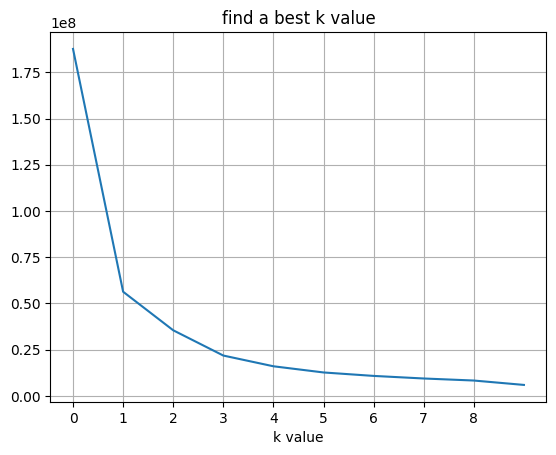

In [ ]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=4

In [ ]:
cluster_model = KMeans(n_clusters=5)
cluster_model.fit(x_train_ss)
x_train_ss['cluster'] = cluster_model.predict(x_train_ss)
x_test_ss['cluster'] = cluster_model.predict(x_test_ss)

In [101]:
x_train_ss['cluster']

0      3
1      3
2      2
3      0
4      1
      ..
421    3
422    3
423    2
424    3
425    3
Name: cluster, Length: 426, dtype: int32

In [102]:
x_test_ss['cluster']

0      1
1      0
2      1
3      2
4      3
      ..
138    3
139    0
140    0
141    0
142    4
Name: cluster, Length: 143, dtype: int32

In [105]:
cluster_model.predict(pd.DataFrame(x_train_ss.iloc[127]).T.drop(columns='cluster'))

array([3], dtype=int32)

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
from sklearn.metrics import accuracy_score,recall_score,classification_report,f1_score,confusion_matrix

In [108]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train_ss,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [110]:
train_preds = logreg_model.predict(x_train_ss)
train_preds

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

In [111]:
test_preds = logreg_model.predict(x_test_ss)
test_preds

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [123]:
def model_evalutor(preds,y_target) :
    print(f'accuracy_score : {round(accuracy_score(y_true=y_target,y_pred=preds),4)}')
    print(f'recall_score : {round(recall_score(y_true=y_target,y_pred=preds),4)}')
    print(f'f1_score : {round(f1_score(y_true=y_target,y_pred=preds),4)}')
    print(f'confusion_matrix :\n {confusion_matrix(y_true=y_target,y_pred=preds)}')
    print(f'classification_report : \n {classification_report(y_true=y_target,y_pred=preds)}')

    

In [124]:
model_evalutor(train_preds,y_train)

accuracy_score : 0.9906
recall_score : 0.9811
f1_score : 0.9873
confusion_matrix :
 [[266   1]
 [  3 156]]
classification_report : 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       0.99      0.98      0.99       159

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426



In [125]:
model_evalutor(test_preds,y_test)

accuracy_score : 0.986
recall_score : 0.9623
f1_score : 0.9808
confusion_matrix :
 [[90  0]
 [ 2 51]]
classification_report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
# y model already gives good results. I use PCA not to improve performance, but to better understand, simplify, and validate the model.

In [127]:
from sklearn.decomposition import PCA

In [128]:
ss = StandardScaler()

In [130]:
x_train_sc = ss.fit_transform(x_train)
x_train_sc

array([[-0.45705383, -0.57807019, -0.51876228, ..., -1.32138246,
        -1.54934383, -1.24897238],
       [-0.50827557, -0.6546949 , -0.51876228, ..., -0.42918109,
        -0.43835301, -0.42803171],
       [ 1.99305272,  0.27408951,  1.9125457 , ...,  1.7178113 ,
        -0.99305599, -0.53329518],
       ...,
       [ 2.06988533, -0.98441337,  2.04461471, ...,  1.24103929,
        -0.26084805,  0.17666118],
       [-0.37737557,  2.34295679, -0.42961569, ..., -0.75745532,
        -0.77275966, -1.07162631],
       [-0.51112122, -0.79865648, -0.53362004, ..., -1.01299904,
        -0.65389474, -1.17345728]], shape=(426, 30))

In [132]:
x_test_sc = ss.transform(x_test)

In [133]:
x_test_sc

array([[ 1.70564185,  1.0496245 ,  1.77222238, ...,  1.17574886,
         0.63301618,  0.63604471],
       [-0.73308209, -0.13689759, -0.76020094, ..., -0.78508987,
         0.65203457, -0.75583589],
       [ 1.44384185,  1.26788883,  1.67729777, ...,  0.93888124,
         0.44600203,  1.0714007 ],
       ...,
       [-1.56486623, -0.17172701, -1.55467859, ..., -1.74410005,
         0.3921166 , -0.13798507],
       [-0.86398209, -0.51537724, -0.84645851, ..., -0.29951126,
        -0.18160477,  1.90092264],
       [ 0.47062879, -0.02776542,  0.63312714, ...,  1.49764588,
         2.14022342,  1.22586341]], shape=(143, 30))

In [135]:
pca = PCA()
pca.fit(x_train)
pca.explained_variance_ratio_.cumsum().T

array([0.98142021, 0.99788849, 0.9997753 , 0.99990102, 0.99998759,
       0.99999448, 0.99999856, 0.99999936, 0.99999971, 0.9999999 ,
       0.99999996, 0.99999998, 0.99999999, 0.99999999, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [136]:
#n_componets =2

In [137]:
pca_model=PCA(n_components=2)
x_train_pca = pca_model.fit_transform(x_train_sc)
x_test_pca = pca_model.transform(x_test_sc)

In [138]:
logreg_pca = LogisticRegression()

In [140]:
logreg_pca.fit(x_train_pca,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [141]:
train_preds1 = logreg_pca.predict(x_train_pca)
test_preds1 = logreg_pca.predict(x_test_pca)

In [143]:
model_evalutor(train_preds1,y_train)

accuracy_score : 0.9531
recall_score : 0.9308
f1_score : 0.9367
confusion_matrix :
 [[258   9]
 [ 11 148]]
classification_report : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       267
           1       0.94      0.93      0.94       159

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426



In [144]:
model_evalutor(test_preds1,y_test)

accuracy_score : 0.958
recall_score : 0.9434
f1_score : 0.9434
confusion_matrix :
 [[87  3]
 [ 3 50]]
classification_report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [ ]:
# PCA was tried, but the model without PCA gave better results